# Python数据分析(week6)

复习数据的读取，分进合集等知识点。把坑填一下。

In [101]:
import pandas as pd

## 框框框

**数据框本身是多个变数构成的观察序列**  
* pd.DataFrame 的主流参数是字典
* 该字典的键keys是由变数构成，相当於表格中一行行的标题
* 该字典的值values是由观察的列表构成，相当於表格中一行行的数据
* 表格真的要是表格, 该字典的每个观察的列表数量必需齐一

[小贴士] 最后一个逗点可有可无(为什麽?)，在pandas情境下最好留(为什麽?)  
方便观察，避免出错。

In [3]:
# 尝试
框框 = pd.DataFrame ( {
        "变数X": ["观察X1", "观察X2", "观察X3", "观察X4"],
        "变数Y": ["观察Y1", "观察Y2", "观察Y3", "观察Y4"],
        "变数Z": ["观察Z1", "观察Z2", "观察Z3", "观察Z4"],
        "变数O": ["观察O1", "观察O2", "观察O3", "观察O4"],
      } )
框框
# 数据框的建构就是里面的多个变数，外面括号括起来的字典。

,变数X,变数Y,变数Z,变数O
0,观察X1,观察Y1,观察Z1,观察O1
1,观察X2,观察Y2,观察Z2,观察O2
2,观察X3,观察Y3,观察Z3,观察O3
3,观察X4,观察Y4,观察Z4,观察O4


In [20]:
# 先弄字典, 再弄 框框 的写法片语
# 数据要等长，不然没法形成字典
字典 = {
        "变数X": ["观察X1", "观察X2", "观察X3", "观察X4"],
        "变数Y": ["观察Y1", "观察Y2", "观察Y3", "观察Y4"],
        "变数Z": ["观察Z1", "观察Z2", "观察Z3", "观察Z4"],
        "变数O": ["观察O1", "观察O2", "观察O3", "观察O4"],
       }

框框 = pd.DataFrame ( 字典 )
框框

,变数X,变数Y,变数Z,变数O
0,观察X1,观察Y1,观察Z1,观察O1
1,观察X2,观察Y2,观察Z2,观察O2
2,观察X3,观察Y3,观察Z3,观察O3
3,观察X4,观察Y4,观察Z4,观察O4


In [21]:
from IPython.display import display, HTML
display (框框)

,变数X,变数Y,变数Z,变数O
0,观察X1,观察Y1,观察Z1,观察O1
1,观察X2,观察Y2,观察Z2,观察O2
2,观察X3,观察Y3,观察Z3,观察O3
3,观察X4,观察Y4,观察Z4,观察O4


**框框框**(DataFrame)的取变数成 **系列** (Series)

In [22]:
框框 ["变数X"]  # [] 像字典取值, 改值从列表升级为有**索引的序列**

0    观察X1
1    观察X2
2    观察X3
3    观察X4
Name: 变数X, dtype: object

In [13]:
# 只取值
框框 ["变数X"].values

array(['观察X1', '观察X2', '观察X3', '观察X4'], dtype=object)

In [14]:
# 只取索引
框框 ["变数X"].index

RangeIndex(start=0, stop=4, step=1)

In [17]:
# 看不懂怎么办 list框起来
list(框框 ["变数O"].index)

[0, 1, 2, 3]

In [29]:
# 还是看不懂怎么办
# Series就是索引/序列，就是这里说的“框框”。说法不同，有被坑到，谢谢：）

In [37]:
# 取观察
# 用 .loc[] 取列, 相当於所有变数的某一次观察
# 为什么取第二列得第三列？因为第一列的序号是0
# 真尼玛坑，把变数放到左边了，实际上取得就是第三行的数据
框框.loc[2]   # loc = location  row

变数X    观察X3
变数Y    观察Y3
变数Z    观察Z3
变数O    观察O3
Name: 2, dtype: object

In [33]:
# 错误尝试，取不出行的
# 框框.loc(变数X)
# ---------------------------------------------------------------------------
# NameError                                 Traceback (most recent call last)
# <ipython-input-32-e31e329a9430> in <module>
# ----> 1 框框.loc(变数X)

# NameError: name '变数X' is not defined


In [31]:
# 又看不懂了，不慌，list一下
list(框框.loc[2])

['观察X3', '观察Y3', '观察Z3', '观察O3']

In [28]:
# 这些方法，都可以达到取出变数的效果，我偏爱无脑list(xx["变数"])
print ( 框框 ["变数X"].to_list() )    
print ( list(框框 ["变数X"]) )
print ( list(框框 ["变数X"].values) )
print ( list(框框 ["变数X"].index) )

# 区分读/写代码: 你可以挑一个你比较常用的"说法", 但你看到别人不同的说法时, 你需要知道是同一件事
# 廖老师牛逼！

['观察X1', '观察X2', '观察X3', '观察X4']
['观察X1', '观察X2', '观察X3', '观察X4']
['观察X1', '观察X2', '观察X3', '观察X4']
[0, 1, 2, 3]


In [40]:
# **失败案例**，后面没说明白取这个小小的变数O（index索引）还是具体的值（values值）。
# 框框.["变数O"]
# File "<ipython-input-36-000b83d468e1>", line 1
    # 框框.["变数O"]       ^
# SyntaxError: invalid syntax

![01_table_dataframe.svg](https://pandas.pydata.org/pandas-docs/version/1.0.2/_images/01_table_dataframe.svg)
### 框框框的小结
* 数据表格的习惯是变数variables与观察observations
* 数据表格要等长，不然会报错。
* pandas框框框构建，就是把变数和观察包在索引/系列里面。
* 框框框字典（pd.DataFrame），“框框 ["变数X"]”这种已经变成序列的取得就是变数X的所有观察。（横着的是列row，里面是变数；竖着的是行column，里面是观察。）
  * .loc[] 取  变数, 列 row
  * [""] 取  观察, 行 column
    * 框框.loc[2]取得就是第三列	观察X3	观察Y3	观察Z3	观察O3
    * 框框.["变数O"].index取得就是这一整个序列，框框.["变数O"].values取得就是变数O里面具体的一个一个值。  
    记得格式是先把字典搞好，然后再字典名.loc[]/[""]取想要的东西，简单来说取横着的就loc，竖着的直接[]

## 读取数据

* 读到csv = pd.read_csv("路径档案名", encoding="utf8")
* 读到tsv = pd.read_csv("路径档案名", encoding="utf8", sep="\t")
* 读到excel = pd.read_excel("路径档案名", encoding="utf8", sheet_name="分页名称")

读一下好了。。。  
******
IMF有[2020年1月的《世界经济展望》](https://www.imf.org/zh/Publications/WEO/Issues/2020/01/20/weo-update-january2020)，而这数据集的前一份版本都可以在其[数据入口取得](https://www.imf.org/en/data)的EXCEL数据可以下载，共用三种形式，你能用正确的参数取得数据框吗? 
* “SDMX Data” [全数据](https://www.imf.org/external/pubs/ft/weo/2019/02/weodata/download.aspx) [zip](https://www.imf.org/external/pubs/ft/weo/2019/02/weodata/WEOOct2019_SDMXData.zip)


In [78]:
df = pd.read_csv("try.tsv", encoding="utf8", sep="\t")
df.head()
# 成功的喜悦科科
# df.info()
# 也就是打印啦这里显示的信息都是以列为单位（columns）
# !!!!为什么这个tsv用不了df.describe,因为默认是描述数字类型的属性，这里全是字，读个der

,WEO Country Group Code,WEO Subject Code,Country Group Name,Subject Descriptor,Subject Notes,Units,Scale,Series-specific Notes,1980,1981,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Estimates Start After
0,1,NGDP_RPCH,World,"Gross domestic product, constant prices",NaN,Percent change,NaN,NaN,2.066,1.862,...,3.39,3.811,3.605,3.013,3.41,3.555,3.557,3.607,3.619,NaN
1,1,NGDP_RPCHMK,World,"Gross domestic product, constant prices",NaN,Percent change (market exchange rates),NaN,NaN,1.663,1.966,...,2.57,3.227,3.077,2.47,2.747,2.826,2.8,2.833,2.853,NaN
2,1,NGDPD,World,"Gross domestic product, current prices",NaN,U.S. dollars,Billions,NaN,"11,156.37","11,419.22",...,"75,823.65","80,262.15","84,929.51","86,598.83","90,519.61","95,353.02","100,409.01","105,786.19","111,569.46",NaN
3,1,PPPGDP,World,"Gross domestic product, current prices",NaN,Purchasing power parity; international dollars,Billions,NaN,"13,270.50","14,769.84",...,"120,832.22","127,703.39","135,435.95","141,859.63","149,533.60","157,972.10","166,794.50","176,187.83","186,155.68",NaN
4,1,NGDP_D,World,"Gross domestic product, deflator",NaN,"Index, 2000=100",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# df.describe（）查看数据值列的汇总统计
# 可返回变量和观测的数量、缺失值和唯一值的数目、平均值、分位数等相关信息

坑坑合集  
* 少用csv，多用tsv
* 从excel转到csv，直接黏贴到记事本，默认tab分格，直接tsv格式了。舒适


 **错误示范**  
 **pandas并不能直接读.xlsx 所以老老实实转tsv好了** 
 确实是错误示范，因为我这个憨批忘了可以直接读，改一下代码就好。。。
 df = pd.read_xlsx("20春_pandas_week02_hurun_unicorn.xlsx")  
 df.head() 
 
 
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-51-7fa422718a52> in <module>
----> 1 df = pd.read_xlsx("20春_pandas_week02_hurun_unicorn.xlsx")
      2 df()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\__init__.py in __getattr__(name)
    261             return _SparseArray
    262 
--> 263         raise AttributeError(f"module 'pandas' has no attribute '{name}'")
    264 
    265 

AttributeError: module 'pandas' has no attribute 'read_xlsx'
'''

In [75]:
df = pd.read_excel("20春_pandas_week02_hurun_unicorn.xlsx", encoding="utf8", sheet_name="独角兽")
df.head()

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
3,4,Infor,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
4,5,JUUL Labs,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."


In [76]:
df.describe(include="all")

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
count,494.000000,494,494,494.000000,494,494,494,494,494.000000,494
unique,NaN,494,494,NaN,24,120,25,485,NaN,489
top,NaN,Quikr,Quikr,NaN,中国,北京,电子商务,张勇,NaN,未透露
freq,NaN,1,1,NaN,206,81,68,3,NaN,3
mean,180.977733,NaN,NaN,238.805668,NaN,NaN,NaN,NaN,2011.234818,NaN
std,91.073191,NaN,NaN,623.158537,NaN,NaN,NaN,NaN,3.792477,NaN
min,1.000000,NaN,NaN,70.000000,NaN,NaN,NaN,NaN,2000.000000,NaN
25%,84.000000,NaN,NaN,70.000000,NaN,NaN,NaN,NaN,2009.000000,NaN
50%,224.000000,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,2012.000000,NaN
75%,264.000000,NaN,NaN,200.000000,NaN,NaN,NaN,NaN,2014.000000,NaN


In [82]:
# 廖博士小讲堂：牛逼的用法
# df.describe()不加include.all就可以看成数据框，直接用
df.describe().loc['min']
# 坑坑又来了，记得describe默认取得是数字数字数字！

WEO Country Group Code    1.0
Estimates Start After     NaN
Name: min, dtype: float64

In [85]:
df.count()
#一个数列中非na元素的个数

WEO Country Group Code    1677
WEO Subject Code          1677
Country Group Name        1677
Subject Descriptor        1677
Subject Notes              130
Units                     1677
Scale                      910
Series-specific Notes        9
1980                       323
1981                       333
1982                       332
1983                       334
1984                       341
1985                       351
1986                       356
1987                       356
1988                       361
1989                       364
1990                       378
1991                       399
1992                       407
1993                       417
1994                       424
1995                       434
1996                       443
1997                       467
1998                       470
1999                       484
2000                       505
2001                       520
2002                       521
2003                       521
2004    

In [91]:
df.to_markdown
# 牛逼！证明爷的pandas库很新,不可加括弧

<bound method DataFrame.to_markdown of       排名                   企业名称           Company Name  估值（亿人民币）  国家   城市  \
0      1                   蚂蚁金服          Ant Financial     10000  中国   杭州   
1      2                   字节跳动              Bytedance      5000  中国   北京   
2      3                   滴滴出行           Didi Chuxing      3600  中国   北京   
3      4                  Infor                  Infor      3500  美国   纽约   
4      5              JUUL Labs              JUUL Labs      3400  美国  旧金山   
..   ...                    ...                    ...       ...  ..  ...   
489  264            Zeta Global            Zeta Global        70  美国   纽约   
490  264                  掌门1对1               Zhangmen        70  中国   上海   
491  264                     转转             Zhuanzhuan        70  中国   北京   
492  264  Zipline International  Zipline International        70  美国  半月湾   
493  264           ZipRecruiter           ZipRecruiter        70  美国  洛杉矶   

        行业                          

In [88]:
df = pd.read_csv("20春_pandas_week02_hurun_unicorn.tsv", encoding="utf8", sep="\t")
df.head()
# df是DataFrame的缩写，这里表示读取进来的数据，比如，最简单的一个实例：

# import pandas as pddf = pd.read_excel(r'C:\Users\Shan\Desktop\x.xlsx')print(df.head())

# df.head()会将zhidaoexcel表格专中的第一行看作列名，并默认输出之后的五行。
#在head后面的括号里面直接写你想要输出的行数也行，比属如2，10，100之类的。

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
3,4,Infor,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
4,5,JUUL Labs,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."


In [89]:
# 我要输出十行，就是十行。
df = pd.read_csv("20春_pandas_week02_hurun_unicorn.tsv", encoding="utf8", sep="\t")
df.head(10)

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
3,4,Infor,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
4,5,JUUL Labs,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."
5,6,爱彼迎,Airbnb,2700,美国,旧金山,共享经济,"Brian Chesky, Joe Gebbia, Nathan Blecharczyk",2008,"Tiger Global Management, Founders Fund, Y Comb..."
6,6,陆金所,Lufax,2700,中国,上海,金融科技,计葵生,2011,摩根士丹利、中银集团、国泰君安（香港）
7,8,SpaceX,SpaceX,2500,美国,洛杉矶,航天,Elon Musk,2002,"DFJ, Founders Fund, Google, Bank of America, B..."
8,9,WeWork,WeWork,2100,美国,纽约,共享经济,"Adam Neumann, Miguel McKevley",2010,"Softbank, Hony Capital, Glade Brook Capital, W..."
9,10,Stripe,Stripe,1600,美国,旧金山,金融科技,"John Collison, Patrick Collison",2010,"CapitalG, Thrive Capital, Y Combinator, Sequoi..."


In [93]:
df.to_dict()
# 这个是真牛逼，以后不需要手动输入字典了科科

{'排名': {0: 1,
  1: 2,
  2: 3,
  3: 4,
  4: 5,
  5: 6,
  6: 6,
  7: 8,
  8: 9,
  9: 10,
  10: 11,
  11: 12,
  12: 12,
  13: 14,
  14: 15,
  15: 15,
  16: 15,
  17: 15,
  18: 19,
  19: 20,
  20: 20,
  21: 20,
  22: 23,
  23: 23,
  24: 25,
  25: 25,
  26: 25,
  27: 25,
  28: 25,
  29: 30,
  30: 30,
  31: 30,
  32: 30,
  33: 34,
  34: 34,
  35: 34,
  36: 34,
  37: 34,
  38: 34,
  39: 34,
  40: 34,
  41: 34,
  42: 43,
  43: 43,
  44: 43,
  45: 43,
  46: 43,
  47: 43,
  48: 43,
  49: 50,
  50: 50,
  51: 50,
  52: 50,
  53: 50,
  54: 50,
  55: 50,
  56: 57,
  57: 57,
  58: 57,
  59: 57,
  60: 57,
  61: 57,
  62: 57,
  63: 57,
  64: 57,
  65: 57,
  66: 57,
  67: 57,
  68: 57,
  69: 57,
  70: 57,
  71: 57,
  72: 57,
  73: 57,
  74: 57,
  75: 57,
  76: 57,
  77: 57,
  78: 57,
  79: 57,
  80: 57,
  81: 57,
  82: 83,
  83: 84,
  84: 84,
  85: 84,
  86: 84,
  87: 84,
  88: 84,
  89: 84,
  90: 84,
  91: 84,
  92: 84,
  93: 84,
  94: 84,
  95: 84,
  96: 84,
  97: 84,
  98: 84,
  99: 84,
  100: 84,
  

## 切切切

### 切切切的代码片语
切切切的代码片语 (code snippets)，新手请认真记忆，**注意标点及缩进**


####  列子集
```python

df.loc()
df.iloc()
df.set_index()
df.head(n)
df.tail(n)
df.nlargest(n, '变量')
df.nsmallest(n, '变量')
df[df.估值（亿人民币）> 10]
```

#### 行子集
```python

#  行子集
df[['变量X','变量Y','变量Z']]
df[['变量X']]
df['变量X']
```

#### 列+行子集
```python

#  行子集
df.loc[:,['变量X':'变量Z']]    # 注意中括号里的: 和 ,的使用
df.iloc[:,[1,2,5]]
df.loc[df['变量X']>10, ['变量X','变量Z'] ]   
```

子集代码片语说明(你来做笔记)
* 列子集
* 行子集

-----

In [95]:
df.iloc[[0,2],[0,1,3]]
# [0,2]是横着的列，[0,1,3]是竖着的行
# :这比很坏，是从0:4，就是中间全都是。

,排名,企业名称,估值（亿人民币）
0,1,蚂蚁金服,10000
2,3,滴滴出行,3600


In [97]:
df.loc[0:4]

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
3,4,Infor,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
4,5,JUUL Labs,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."


In [108]:
df[df["估值（亿人民币）"]> 3500]

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本


In [110]:
df["估值（亿人民币）"]

0      10000
1       5000
2       3600
3       3500
4       3400
       ...  
489       70
490       70
491       70
492       70
493       70
Name: 估值（亿人民币）, Length: 494, dtype: int64

## 绘绘绘
绘绘绘的代码片语 (code snippets)，新手请认真记忆，**注意标点及缩进**

```python
df.plot()
```

代码片语说明

-----

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27665 missing from c

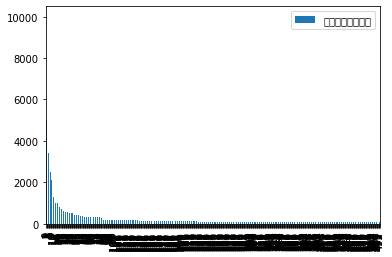

In [111]:
df[["估值（亿人民币）"]].plot(kind="bar")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27665 missing from c

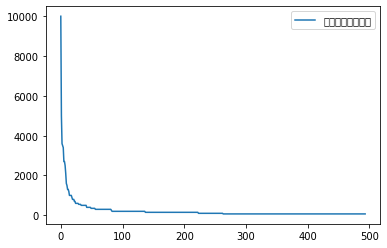

In [112]:
df[["估值（亿人民币）"]].plot(kind="line")

## 列列列
列列列的代码片语 (code snippets)，新手请认真记忆，**注意标点及缩进**

```python

df['新变量'] = df['变量X'] + df['变量Y']
df['新变量'] = [ 转换(x) for x in df['变量Y'] ]     # 列表推导转换

```

代码片语说明

-----

In [ ]:
df['新变量'] = df['变量X'] + df['变量Y']

## 算算算
算算算的代码片语 (code snippets)，新手请认真记忆，**注意标点及缩进**

```python

df.describe()
df.describe(include=all)

df.count()
df.sum()

df.min()
df.max()
df.mean()
df.median()

df.var()
df.std()
```

代码片语说明

-----

# 数据框出报表
数据科学之分进合击